# General Analysis of variation of local networks

## Load the experiment 5 database

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('outputs/exp5_aleatory_linear_circle_3_9_1000/data.csv')
df.head()

,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_local_attractors,n_pair_attractors,n_attractor_fields,n_time_find_attractors,n_time_find_pairs,n_time_find_fields
0,1,3,5,4,2,2,5,3,1,0.179143,0.000120,0.000084
1,1,4,5,4,2,2,7,5,1,0.237144,0.000115,0.000083
2,1,5,5,4,2,2,9,7,1,0.273836,0.000100,0.000069
3,1,6,5,4,2,2,11,9,1,0.345582,0.000121,0.000079
4,1,7,5,4,2,2,13,11,1,0.408823,0.000149,0.000094


In [14]:
df.keys()

Index(['i_sample', 'n_local_networks', 'n_var_network', 'v_topology',
       'n_output_variables', 'n_clauses_function', 'n_local_attractors',
       'n_pair_attractors', 'n_attractor_fields', 'n_time_find_attractors',
       'n_time_find_pairs', 'n_time_find_fields'],
      dtype='object')

## Stable Attractor Fields ViolinPlots in different topologies

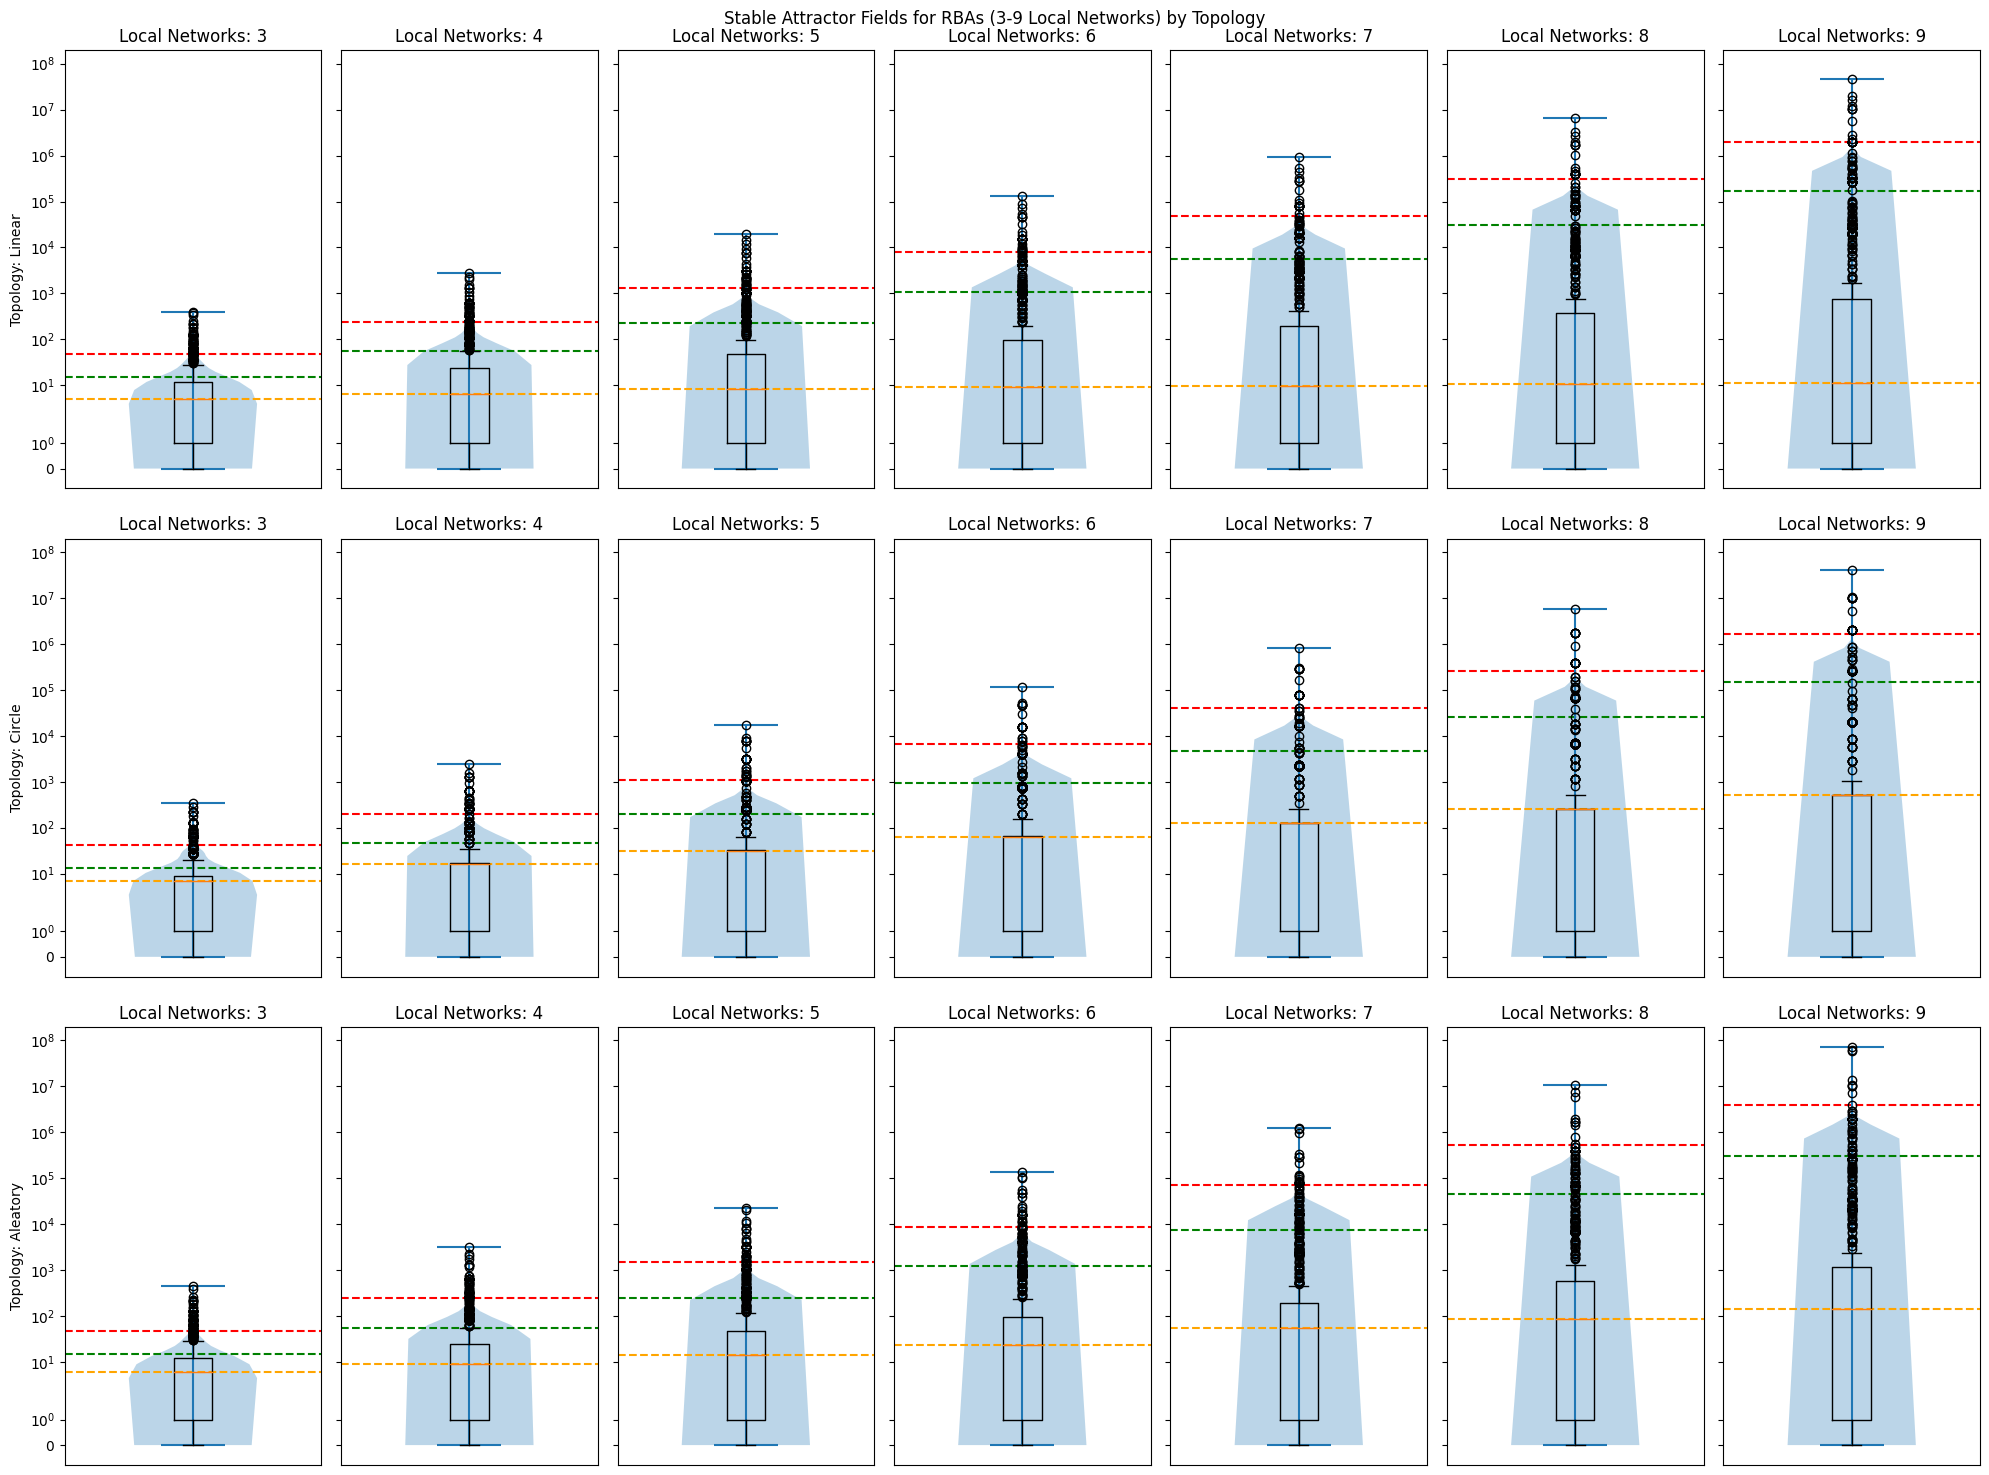

In [23]:
# Filter the data for specific topologies and local networks
l_topologies = df['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle", 2: "Aleatory"}

# Filtrar los datos para redes locales entre 3 y 9
filtered_df = df[(df['n_local_networks'] >= 3) & (df['n_local_networks'] <= 9)]

# Agrupar por topología y redes locales
grouped = filtered_df.groupby(['v_topology', 'n_local_networks'])

# Crear subplots: una fila por cada topología, 7 gráficos por fila (para las redes locales de 3 a 9)
fig, axs = plt.subplots(len(l_topologies), 7, sharey=True, figsize=(20, 5 * len(l_topologies)))

# Si solo hay una topología, convertir axs a una lista de listas para que sea iterable
if len(l_topologies) == 1:
    axs = [axs]

# Iterar a través de las topologías
for row_axs, i_topology in zip(axs, l_topologies):
    # Iterar a través de los números de redes locales de 3 a 9
    for ax, n_local in zip(row_axs, range(3, 10)):
        # Verificar si hay datos para la combinación de topología y número de redes locales
        if (i_topology, n_local) in grouped.groups:
            group = grouped.get_group((i_topology, n_local))
            data = group['n_attractor_fields']

            # Calcular la media y la desviación estándar
            median = data.median()
            mean = data.mean()
            std_max = data.std()

            # Trazar líneas de media, desviación estándar y mediana
            ax.axhline(y=mean, xmin=0.0, xmax=1.0, color='g', ls='--',
                       label=fr'$\bar{{x}}={mean:.4g}$')
            ax.axhline(y=mean + std_max, xmin=0.0, xmax=1.0, color='r', ls='--',
                       label=fr'$\sigma={std_max:.4g}$')
            ax.axhline(y=median, xmin=0.0, xmax=1.0, color='orange', ls='--',
                       label=fr'Median: ${median:.2e}$')

            # Crear gráfico de violín
            ax.violinplot(data)
            ax.boxplot(data)
        else:
            # Si no hay datos para la combinación, dejar el gráfico vacío
            ax.text(0.5, 0.5, 'No data', horizontalalignment='center', verticalalignment='center')

        # Configurar etiquetas y límites
        ax.set_title(f'Local Networks: {n_local}')
        ax.set_yscale('symlog')
        ax.set_xticks([])

    # Etiquetar cada fila con la topología
    row_axs[0].set_ylabel(f'Topology: {labels_topologies.get(i_topology, "Unknown")}')

# Establecer el título general de la figura y el layout
fig.suptitle('Stable Attractor Fields for RBAs (3-9 Local Networks) by Topology')
fig.tight_layout(h_pad=2)

# Mostrar el gráfico
plt.show()


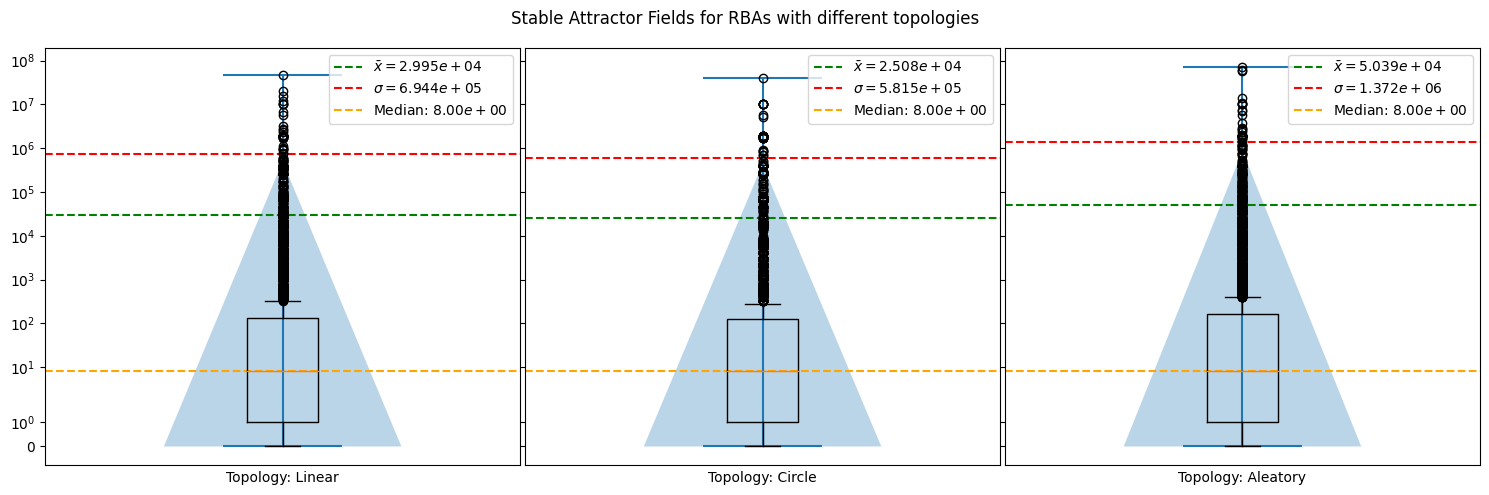

In [22]:
# Filter the data for specific topologies and local networks
l_topologies = df['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle", 2: "Aleatory"}

# Agrupar por topología
grouped = df.groupby('v_topology')

# Crear subplots
fig, axs = plt.subplots(1, len(l_topologies), sharey=True, figsize=(15, 5))

# Si solo hay un subplot, hacer que axs sea una lista para iterar de forma uniforme
if len(l_topologies) == 1:
    axs = [axs]

# Iterar a través de las topologías y crear los gráficos
for ax, i_topology in zip(axs, l_topologies):
    group = grouped.get_group(i_topology)
    data = group['n_attractor_fields']

    # Calcular la media y la desviación estándar
    median = data.median()
    mean = data.mean()
    std_max = data.std()

    # Trazar líneas de media y desviación estándar
    ax.axhline(y=mean, xmin=0.0, xmax=1.0, color='g', ls='--',
               label=fr'$\bar{{x}}={mean:.4g}$')
    ax.axhline(y=mean + std_max, xmin=0.0, xmax=1.0, color='r', ls='--',
               label=fr'$\sigma={std_max:.4g}$')
    # Create median line (consider error bars for robustness)
    ax.axhline(y=median, xmin=0.0, xmax=1.0, color='orange', ls='--',
               label=fr'Median: ${median:.2e}$')

    # Crear gráfico de violín
    ax.violinplot(data)
    ax.boxplot(data)

    # Configurar etiquetas y límites
    ax.legend()
    ax.set_yscale('symlog')
    ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
    ax.set_xticks([])
    ax.set_xlim((0.5, 1.5))

# Establecer el título general de la figura y el layout
fig.suptitle('Stable Attractor Fields for RBAs with different topologies')
fig.tight_layout(w_pad=0)

# Mostrar el gráfico
plt.show()

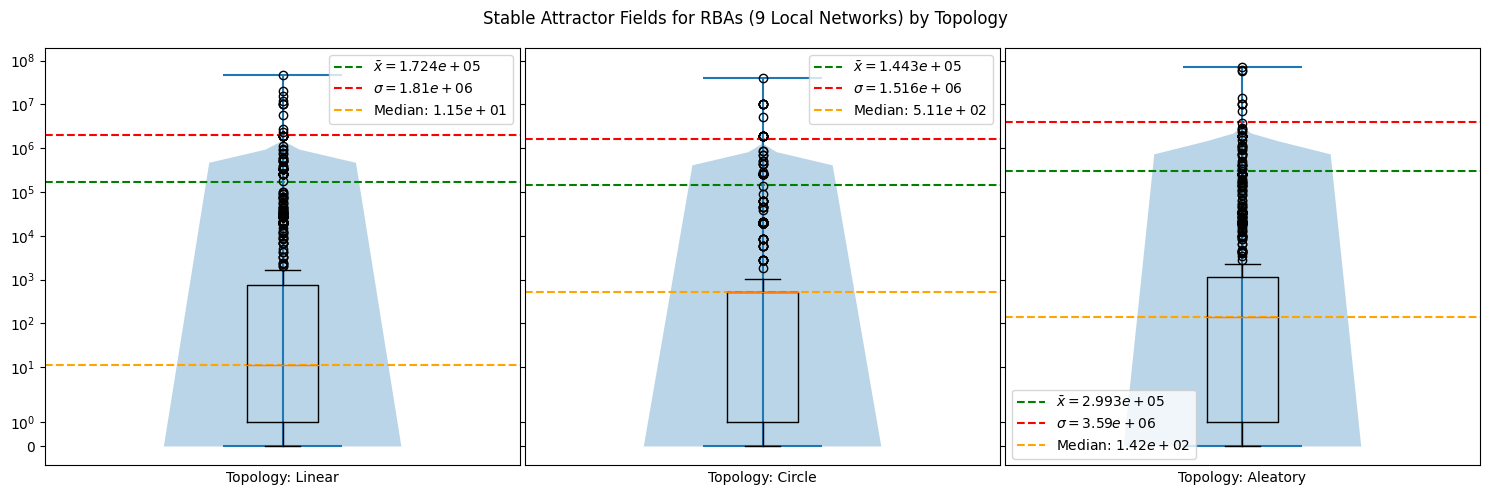

In [24]:
# Filtrar los datos para redes locales de exactamente 9
filtered_df = df[df['n_local_networks'] == 9]

# Obtener las topologías únicas presentes en los datos filtrados
l_topologies = filtered_df['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle", 2: "Aleatory"}

# Agrupar por topología
grouped = filtered_df.groupby('v_topology')

# Crear subplots: uno por cada topología
fig, axs = plt.subplots(1, len(l_topologies), sharey=True, figsize=(15, 5))

# Si solo hay un subplot, hacer que axs sea una lista para iterar de forma uniforme
if len(l_topologies) == 1:
    axs = [axs]

# Iterar a través de las topologías y crear los gráficos
for ax, i_topology in zip(axs, l_topologies):
    group = grouped.get_group(i_topology)
    data = group['n_attractor_fields']

    # Calcular la media y la desviación estándar
    median = data.median()
    mean = data.mean()
    std_max = data.std()

    # Trazar líneas de media y desviación estándar
    ax.axhline(y=mean, xmin=0.0, xmax=1.0, color='g', ls='--',
               label=fr'$\bar{{x}}={mean:.4g}$')
    ax.axhline(y=mean + std_max, xmin=0.0, xmax=1.0, color='r', ls='--',
               label=fr'$\sigma={std_max:.4g}$')
    ax.axhline(y=median, xmin=0.0, xmax=1.0, color='orange', ls='--',
               label=fr'Median: ${median:.2e}$')

    # Crear gráfico de violín
    ax.violinplot(data)
    ax.boxplot(data)

    # Configurar etiquetas y límites
    ax.legend()
    ax.set_yscale('symlog')
    ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
    ax.set_xticks([])
    ax.set_xlim((0.5, 1.5))

# Establecer el título general de la figura y el layout
fig.suptitle('Stable Attractor Fields for RBAs (9 Local Networks) by Topology')
fig.tight_layout(w_pad=0)

# Mostrar el gráfico
plt.show()

## Statistic Description of Number of Attractor Fields by Topology

In [17]:
# Describe the RBAs with Linear topology 
df_linear = df[df['v_topology'] == 4][['n_local_attractors','n_pair_attractors','n_attractor_fields']]
df_circular = df[df['v_topology'] == 3][['n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']]
df_aleatory = df[df['v_topology'] == 2][['n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']]

In [18]:
# Describir solo la columna 'n_attractor_fields' para cada topología
desc_linear = df_linear['n_attractor_fields'].describe()
desc_circular = df_circular['n_attractor_fields'].describe()
desc_aleatory = df_aleatory['n_attractor_fields'].describe()

# Concatenar las descripciones en una sola tabla
df_summary = pd.concat([desc_linear, desc_circular, desc_aleatory], axis=1, keys=['Linear', 'Circular', 'Random'])

# Mostrar la tabla resumen
df_summary

,Linear,Circular,Random
count,7.000000e+03,7.000000e+03,7.000000e+03
mean,2.995159e+04,2.507913e+04,5.039382e+04
std,6.944413e+05,5.815160e+05,1.371802e+06
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00
50%,8.000000e+00,8.000000e+00,8.000000e+00
75%,1.312500e+02,1.290000e+02,1.600000e+02
max,4.611841e+07,4.035361e+07,7.180288e+07


### Top 20 Analysis

In [19]:
# Select the 20 best df_linear and df_circular values for each metric
top_20_linear_attractors = df_linear.nlargest(20, 'n_local_attractors')
top_20_circular_attractors = df_circular.nlargest(20, 'n_local_attractors')
top_20_aleatory_attractors = df_aleatory.nlargest(20, 'n_local_attractors')

top_20_linear_pairs = df_linear.nlargest(20, 'n_pair_attractors')
top_20_circular_pairs = df_circular.nlargest(20, 'n_pair_attractors')
top_20_aleatory_pairs = df_aleatory.nlargest(20, 'n_local_attractors')

top_20_linear_fields = df_linear.nlargest(20, 'n_attractor_fields')
top_20_circular_fields = df_circular.nlargest(20, 'n_attractor_fields')
top_20_aleatory_fields = df_aleatory.nlargest(20, 'n_local_attractors')


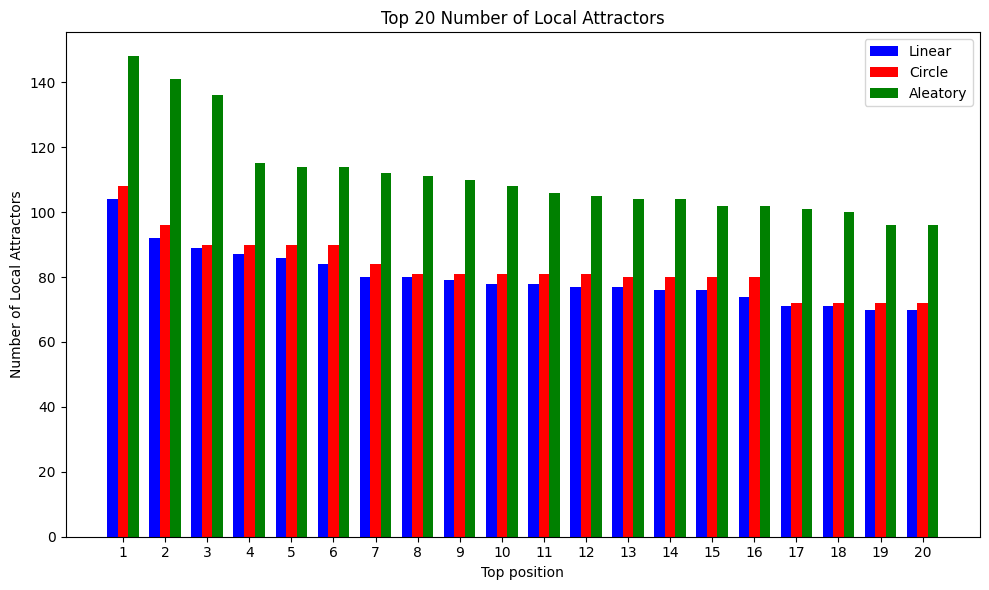

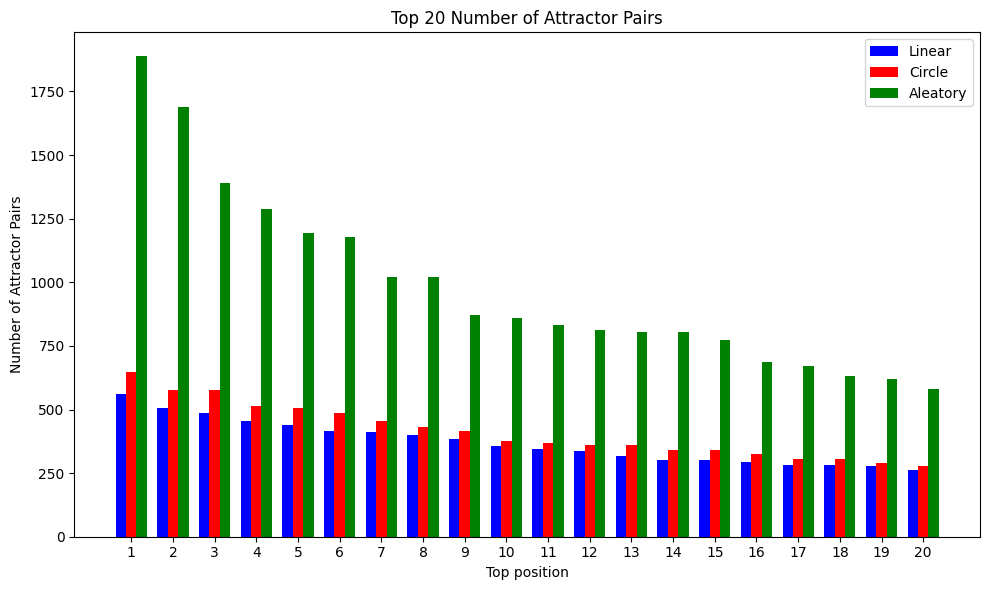

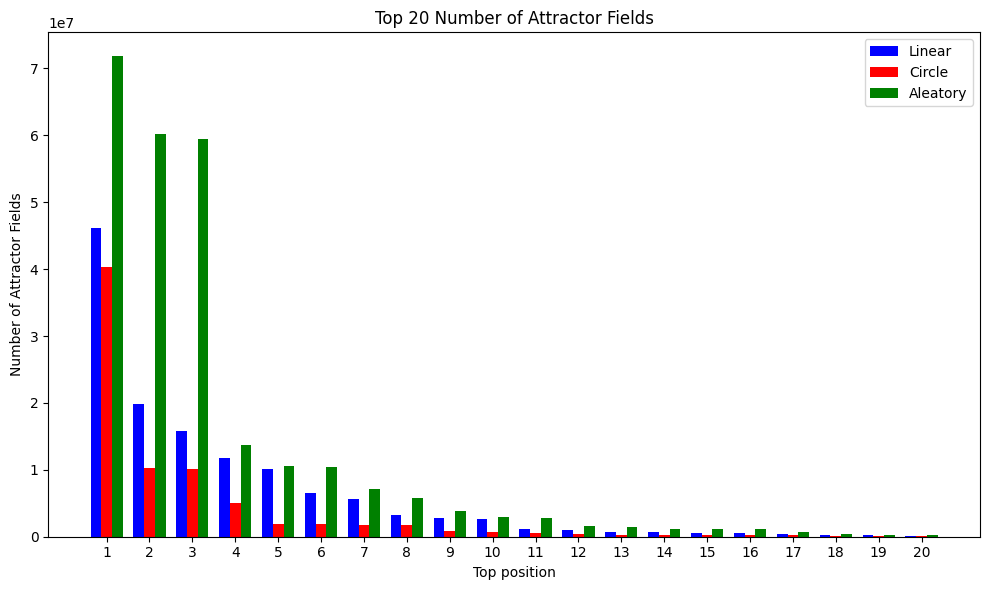

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Function to graph a specific metric
def plot_metric(df_linear, df_circle, df_aleatory, metric, label_y, title):
    # Ordenar los DataFrames por la métrica (de mayor a menor) y seleccionar el top 20
    df_linear_sorted = df_linear.sort_values(metric, ascending=False).head(20)
    df_circle_sorted = df_circle.sort_values(metric, ascending=False).head(20)
    df_aleatory_sorted = df_aleatory.sort_values(metric, ascending=False).head(20)

    positions = np.arange(1, 21)  # Only 20 positions
    width = 0.25  # Adjusted width to fit three bars

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create bars for Linear
    ax.bar(positions - width, df_linear_sorted[metric], width, label='Linear', color='blue')
    # Create bars for Circle
    ax.bar(positions, df_circle_sorted[metric], width, label='Circle', color='red')
    # Create bars for Aleatory
    ax.bar(positions + width, df_aleatory_sorted[metric], width, label='Aleatory', color='green')

    ax.set_title(f'Top 20 {title}')
    ax.set_ylabel(f'Number of {label_y}')  # Label on y axis
    ax.set_xlabel('Top position')  # Label on x axis
    ax.set_xticks(positions)
    ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Example usage:
# Graph for 'n_local_attractors'
plot_metric(top_20_linear_attractors, top_20_circular_attractors, top_20_aleatory_attractors, 'n_local_attractors', "Local Attractors", 'Number of Local Attractors')

# Chart for 'n_pair_attractors'
plot_metric(top_20_linear_attractors, top_20_circular_attractors, top_20_aleatory_pairs, 'n_pair_attractors', "Attractor Pairs", 'Number of Attractor Pairs')

# Graph for 'n_attractor_fields'
plot_metric(top_20_linear_attractors, top_20_circular_attractors, top_20_aleatory_fields, 'n_attractor_fields', 'Attractor Fields', 'Number of Attractor Fields')
